This program is under GNU GENERAL PUBLIC LICENSE Version 2, June 1991. 
See https://www.gnu.org/licenses/old-licenses/gpl-2.0.ja.html for the detail. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

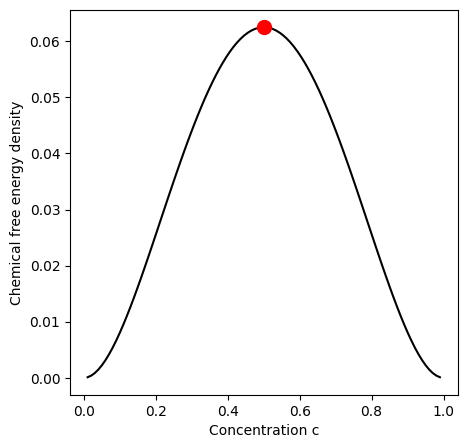

In [2]:
nx = ny = 128
dx = dy = 1.0
total_step = 1000
dt = 1.0e-2
A = 2.0
mobility = 1.0
grad_coef = 1.0
c0 = 0.5

fig = plt.figure(figsize=(5,5))
cc = np.linspace(0.01, 0.99, 100);
plt.plot(cc, cc**2*(1.-cc)**2 ,color='black')
plt.plot(c0, c0**2*(1.-c0)**2 ,color='r',marker='o',markersize=10)
plt.xlabel('Concentration c')
plt.ylabel('Chemical free energy density')
plt.show()

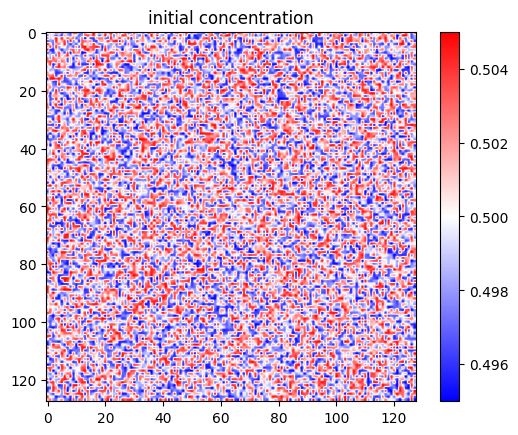

In [3]:
con = np.zeros([nx, ny]) 
dfdcon = np.zeros([nx, ny]) 
con = c0 + 0.01 * (0.5 - np.random.rand(nx, ny))

plt.imshow(con, cmap='bwr')
plt.title('initial concentration')
plt.colorbar()
plt.show() 

In [4]:
def calc_wave_vector(nx, ny, dx, dy):
	nx21 = int(nx/2 + 1)
	ny21 = int(ny/2 + 1)
	nx2 = nx + 2
	ny2 = ny + 2
	dkx = (2.0 * np.pi) / (nx * dx)
	dky = (2.0 * np.pi) / (ny * dy)
	kx = np.zeros([nx, ny])
	ky = np.zeros([nx, ny])
	k2 = np.zeros([nx, ny])
	k4 = np.zeros([nx, ny])

	for i in range(1, nx21):
		for j in range(1, ny):
			fk1 = (i - 1) * dkx
			kx[i, :] = fk1
			kx[nx - i, :] = -fk1
	for i in range(1, nx):
		for j in range(1, ny21):
			fk2 = (j - 1) * dky
			ky[:, j] = fk2
			ky[:, ny - j] = -fk2

	k2[:, :] = kx[:, :]**2 + ky[:, :]**2
	return k2

k2 = calc_wave_vector(nx, ny, dx, dy)
k4 = k2 **2

nstep =  0
Maximum concentration =  0.5053430391454448
Minimum concentration =  0.49451119586816905


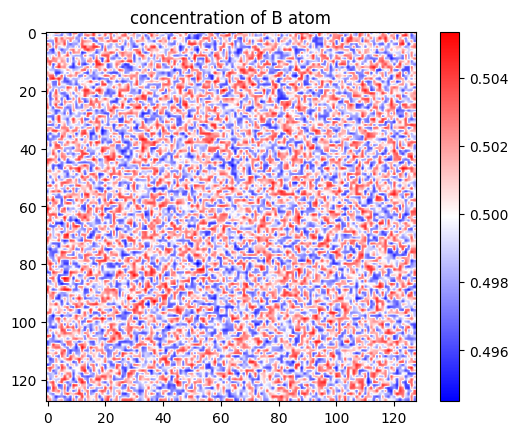

nstep =  100
Maximum concentration =  0.5093626053576199
Minimum concentration =  0.48937682986817244


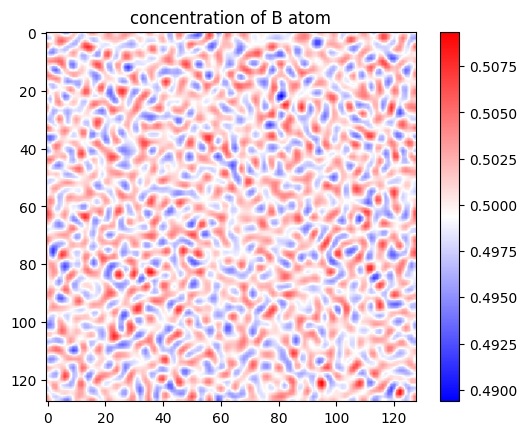

nstep =  200
Maximum concentration =  0.5202983284111278
Minimum concentration =  0.47781414423076113


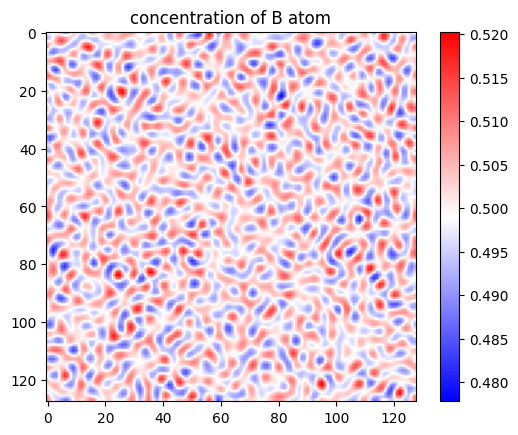

nstep =  300
Maximum concentration =  0.551241316810906
Minimum concentration =  0.4499028771526828


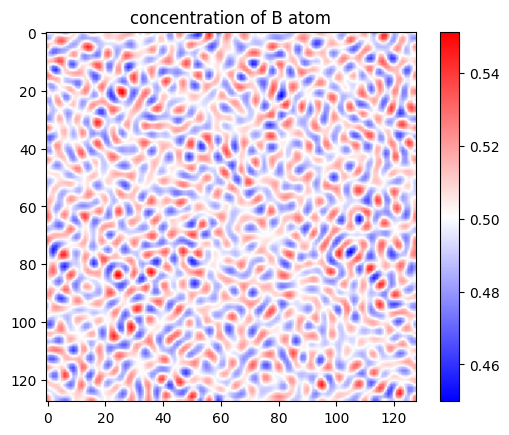

nstep =  400
Maximum concentration =  0.6276639396670036
Minimum concentration =  0.3727455188468998


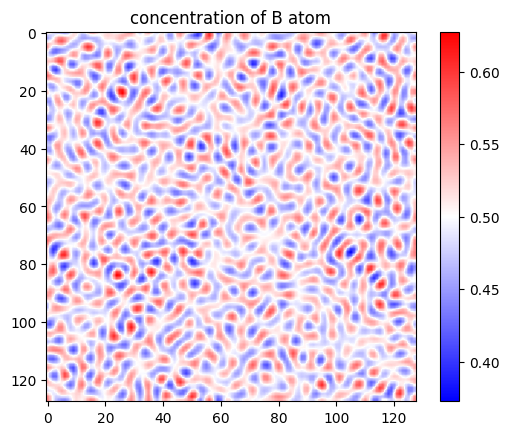

nstep =  500
Maximum concentration =  0.7678039547576968
Minimum concentration =  0.23014694659068724


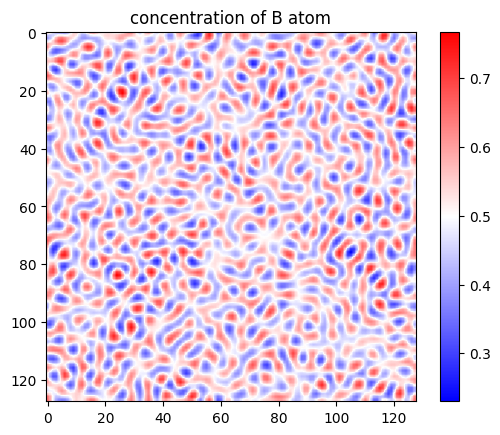

nstep =  600
Maximum concentration =  0.9014853432195774
Minimum concentration =  0.09847942623034622


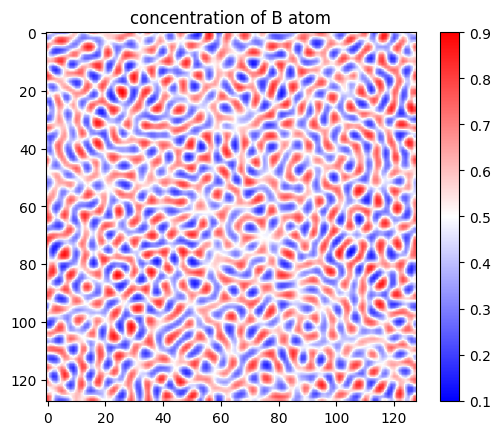

nstep =  700
Maximum concentration =  0.9657322516574799
Minimum concentration =  0.04021475434524946


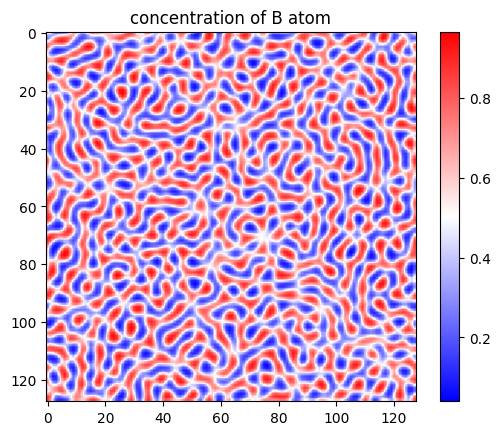

nstep =  800
Maximum concentration =  0.9851175293944902
Minimum concentration =  0.015483039196486303


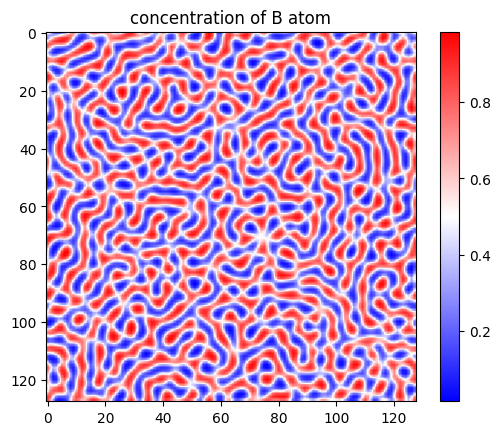

nstep =  900
Maximum concentration =  0.9893684354029616
Minimum concentration =  0.004293780539152414


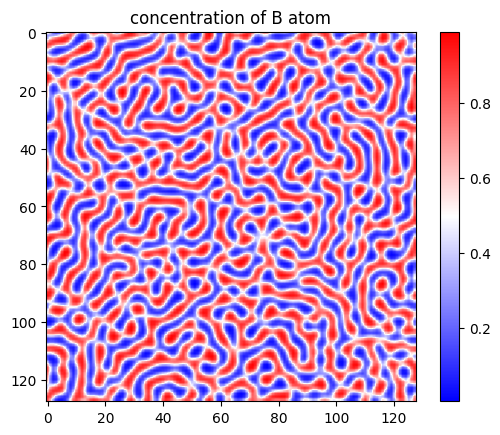

nstep =  1000
Maximum concentration =  0.9909191624189722
Minimum concentration =  -0.00018473518878370232


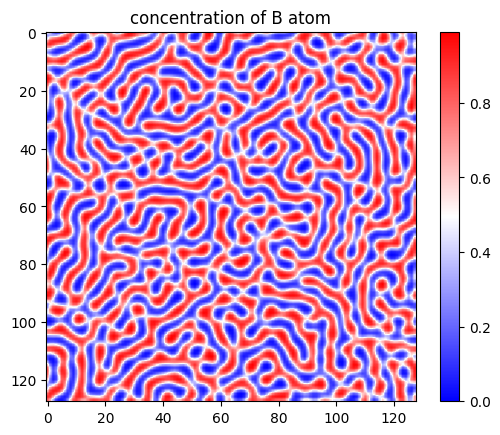

In [5]:
for istep in range(total_step+1):
    conk = np.fft.fftn(con) 
    dfdcon = (2.0 * con * (1 - con)**2 -2.0 * con**2 * (1 - con)) 
    dfdconk = np.fft.fftn(dfdcon)  
    nummer = dt * mobility * A * k2 * dfdconk
    denom = 1.0 + dt * mobility * grad_coef * k4
    conk = (conk - nummer) / denom 
    con = np.real(np.fft.ifftn(conk)) 
    
    if istep % 100 == 0:
        print('nstep = ', istep)
        print('Maximum concentration = ', np.max(con))
        print('Minimum concentration = ', np.min(con))
        plt.imshow(con, cmap='bwr')
        plt.title('concentration of B atom')
        plt.colorbar()
        plt.show() 